# ANALYSIS :-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
da= pd.read_csv("clean_warehouse_data.csv")

# Backup File

In [3]:
df= da.copy()

# (A) Date and Time Based Analysis

In [4]:
df.dtypes

Unnamed: 0                    int64
product_id                    int64
product_name                 object
category                     object
warehouse                    object
location                     object
quantity                      int64
price                       float64
supplier                     object
status                       object
last_restocked               object
total_inventory_purchase    float64
dtype: object

In [5]:
df["last_restocked"]= pd.to_datetime(df["last_restocked"],errors="coerce",dayfirst=True)

C:\Users\rajra\AppData\Local\Temp\ipykernel_16272\1166615390.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["last_restocked"]= pd.to_datetime(df["last_restocked"],errors="coerce",dayfirst=True)


In [6]:
df["year"] = df["last_restocked"].dt.year.astype("Int64")
df["month"]= df["last_restocked"].dt.month.astype("Int64")
df["year_month"]= df["last_restocked"].dt.to_period("M").astype(str)

In [7]:
df["year"] = df["year"].astype(str).replace("<NA>","Unknown")
df["month"] = df["month"].astype(str).replace("<NA>","Unknown")
df["year_month"] = df["year_month"].replace("NaT", "Unknown")

In [8]:
df.head()

,Unnamed: 0,product_id,product_name,category,warehouse,location,quantity,price,supplier,status,last_restocked,total_inventory_purchase,year,month,year_month
0,0,1000,Gadget-Y,Furniture,Warehouse-1,Aisle-2,100,49.99,Supplier-C,Low-Stock,2023-01-15,4999.0,2023,1,2023-01
1,1,1001,Widget-A,Furniture,Warehouse-2,Aisle-5,300,19.99,Supplier-A,In-Stock,NaT,5997.0,Unknown,Unknown,Unknown
2,2,1001,Gadget-X,Toys,Warehouse-3,Aisle-3,150,19.99,Supplier-C,In-Stock,2023-04-25,2998.5,2023,4,2023-04
3,3,1001,Gadget-Y,Furniture,Warehouse-1,Aisle-5,200,49.99,Supplier-C,In-Stock,2022-12-20,9998.0,2022,12,2022-12
4,4,1004,Gadget-Z,Clothing,Warehouse-1,Aisle-3,50,19.99,Supplier-B,Low-Stock,NaT,999.5,Unknown,Unknown,Unknown


## 1. Monthly Purchase Trend

In [9]:
monthly_purchase= df.groupby("year_month")["total_inventory_purchase"].sum().reset_index()
monthly_purchase

,year_month,total_inventory_purchase
0,2022-12,795711.5
1,2023-01,812727.0
2,2023-03,797224.0
3,2023-04,709239.5
4,Unknown,728739.0


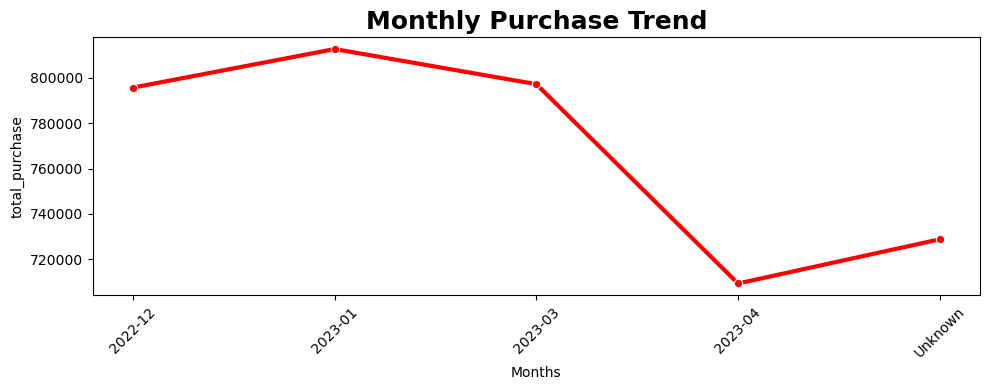

In [10]:
plt.figure(figsize=(10,4))

sns.lineplot(
    data= monthly_purchase,
    x= "year_month",
    y= "total_inventory_purchase",
    color= "red",
    marker= "o",
    linewidth= 3
)

plt.title("Monthly Purchase Trend", fontsize= 18, fontweight= "bold")
plt.xlabel("Months")
plt.ylabel("total_purchase")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

## 2. Total quantity restocked each month

In [11]:
monthly_quantity= df.groupby(["year_month","category"])["quantity"].sum().reset_index()
monthly_quantity

,year_month,category,quantity
0,2022-12,Clothing,6750
1,2022-12,Electronics,8550
2,2022-12,Furniture,7900
3,2022-12,Toys,5650
4,2023-01,Clothing,6600
5,2023-01,Electronics,6450
6,2023-01,Furniture,8400
7,2023-01,Toys,5850
8,2023-03,Clothing,6900
9,2023-03,Electronics,6100


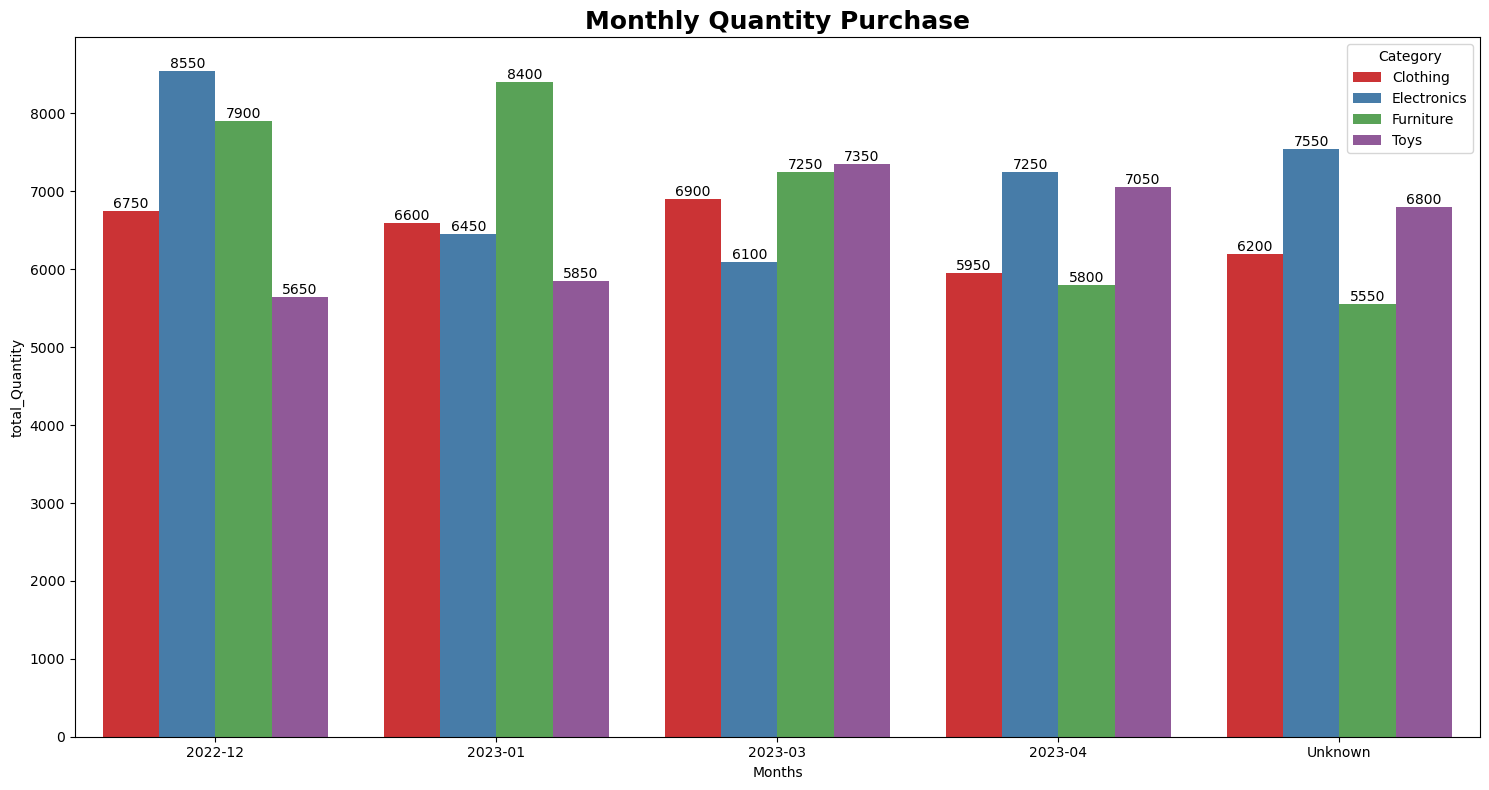

In [12]:
plt.figure(figsize=(15,8))

a= sns.barplot(
    data= monthly_quantity,
    x= "year_month",
    y= "quantity",
    palette= "Set1",
    hue= "category",
    linewidth= 1.5
)

plt.title("Monthly Quantity Purchase", fontsize= 18, fontweight= "bold")
plt.xlabel("Months")
plt.ylabel("total_Quantity")
plt.tight_layout()
plt.legend(title= "Category", loc="upper right", bbox_to_anchor=(1, 1) )
for container in a.containers:
    a.bar_label(container)

# (B) Category-wise Analysis

## 1. Category-wise Total Purchase Value

In [13]:
total_purchase= df.groupby("category")["total_inventory_purchase"].sum().reset_index()

In [14]:
total_purchase

,category,total_inventory_purchase
0,Clothing,945676.0
1,Electronics,1049141.0
2,Furniture,977651.0
3,Toys,871173.0


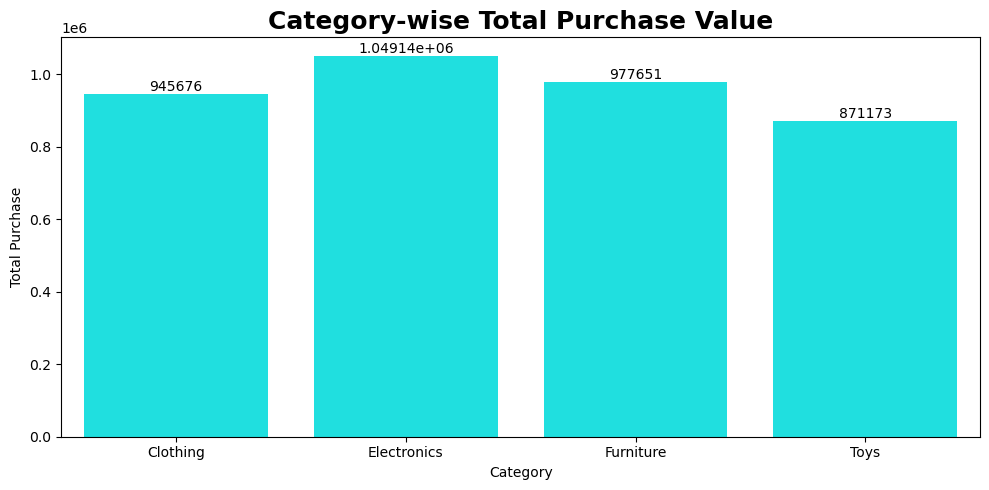

In [15]:
plt.figure(figsize=(10,5))

a= sns.barplot(
    data= total_purchase,
    x= "category",
    y= "total_inventory_purchase",
    color ="#00ffff",
    linewidth= 1.5
)

plt.title("Category-wise Total Purchase Value", fontsize= 18, fontweight= "bold")
plt.xlabel("Category")
plt.ylabel("Total Purchase")
plt.tight_layout()
for container in a.containers:
    a.bar_label(container)

## 2. Category-wise Total Quantity Purchased

In [16]:
total_quantity= df.groupby("category")["quantity"].sum().reset_index()

In [17]:
total_quantity

,category,quantity
0,Clothing,32400
1,Electronics,35900
2,Furniture,34900
3,Toys,32700


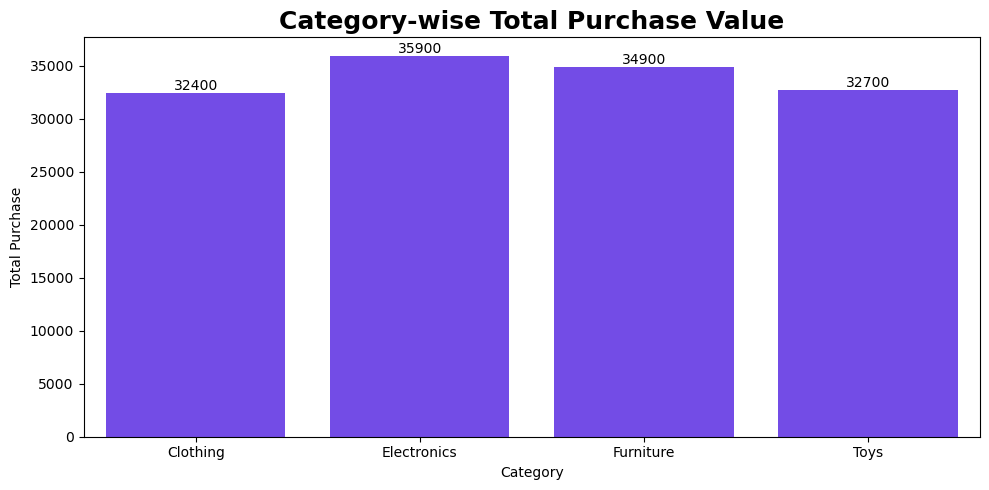

In [18]:
plt.figure(figsize=(10,5))

a= sns.barplot(
    data= total_quantity,
    x= "category",
    y= "quantity",
    color ="#6633FF",
    linewidth= 1.5
)

plt.title("Category-wise Total Purchase Value", fontsize= 18, fontweight= "bold")
plt.xlabel("Category")
plt.ylabel("Total Purchase")
plt.tight_layout()
for container in a.containers:
    a.bar_label(container)

## 3. Category Contribution Percentage

In [19]:
t= df["total_inventory_purchase"].sum()

In [20]:
t

np.float64(3843641.0)

In [21]:
contribution= (total_purchase['total_inventory_purchase']/t*100).round(2).reset_index()

In [22]:
contribution

,index,total_inventory_purchase
0,0,24.60
1,1,27.30
2,2,25.44
3,3,22.67


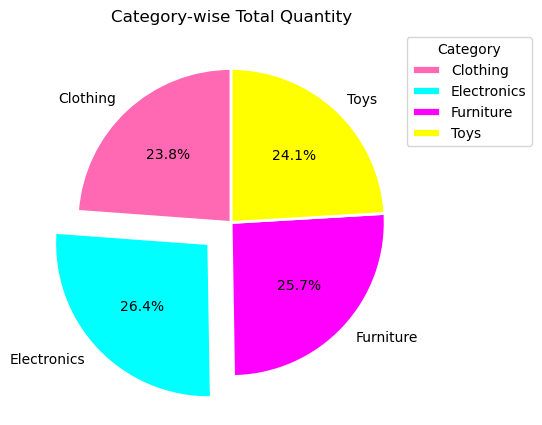

In [23]:
m= [0,0.2,0,0]
c= ["hotpink", "cyan", "magenta","yellow"]
plt.figure(figsize=(5,5))
plt.pie(
    total_quantity["quantity"],
    labels=total_quantity["category"],
    autopct="%1.1f%%",
    startangle=90,
    explode= m,
    colors= c,
    wedgeprops={"edgecolor": "white", "linewidth": 2}
)

plt.title("Category-wise Total Quantity")
plt.legend(title= "Category", loc="upper right", bbox_to_anchor=(1.3, 1) )
plt.show()

# (C) Product Analysis

## 1. Top High Purchasing Products by Total Purchace Value and Quantity

In [24]:
# By total purchase value
top_value= df.groupby("product_name")["total_inventory_purchase"].sum().sort_values(ascending= False).head(3).reset_index()
top_value

,product_name,total_inventory_purchase
0,Gadget-Z,736763.5
1,Widget-A,674267.5
2,Widget-B,648768.5


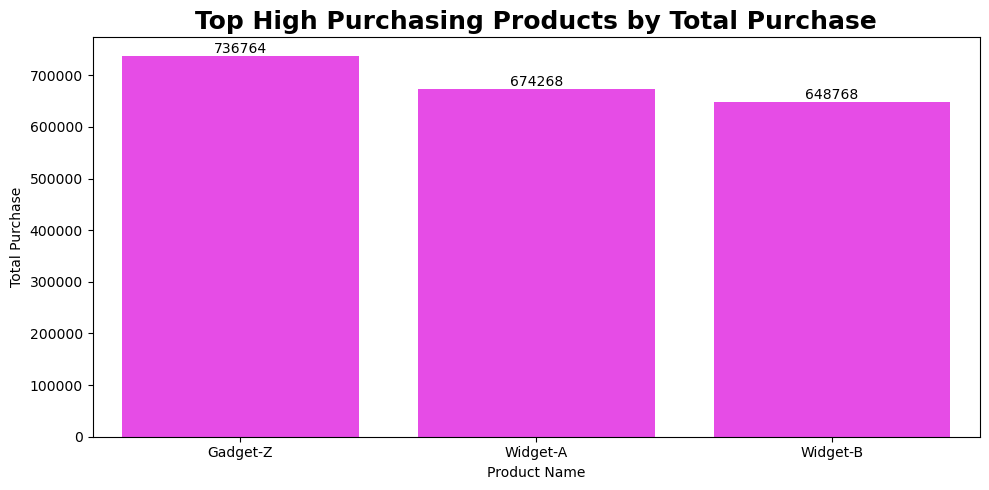

In [25]:
plt.figure(figsize=(10,5))

a= sns.barplot(
    data= top_value,
    x= "product_name",
    y= "total_inventory_purchase",
    color ="#FF33FF",
)

plt.title("Top High Purchasing Products by Total Purchase", fontsize= 18, fontweight= "bold")
plt.xlabel("Product Name")
plt.ylabel("Total Purchase")
plt.tight_layout()
for container in a.containers:
    a.bar_label(container)

In [26]:
# By Quantity
top_quantity= df.groupby("product_name")["quantity"].sum().sort_values(ascending= False).head(3).reset_index()
top_quantity

,product_name,quantity
0,Widget-C,24700
1,Gadget-Y,24300
2,Gadget-Z,23650


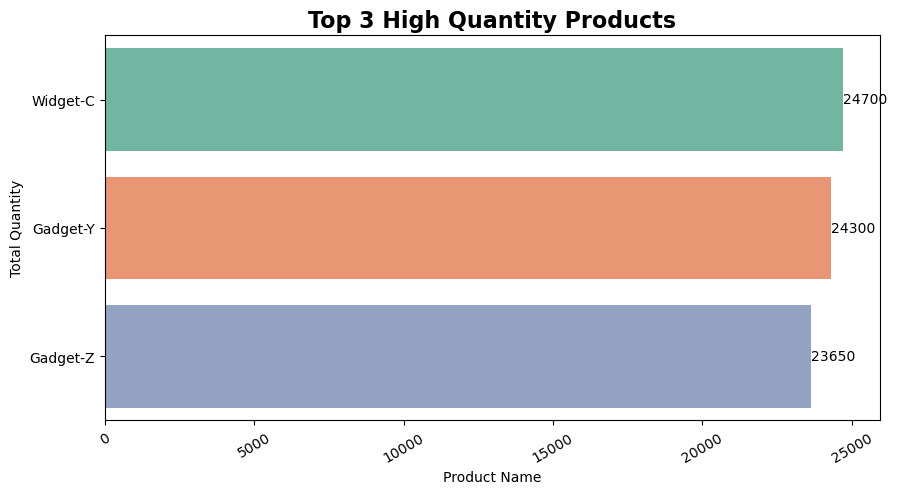

In [27]:
plt.figure(figsize=(10,5))

ax = sns.barplot(
    data=top_quantity,
    x="quantity",
    y="product_name",
    palette="Set2",
    hue= "product_name"
)

plt.title("Top 3 High Quantity Products", fontsize=16, fontweight="bold")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity")
plt.xticks(rotation=30)

# labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


## 2. Top Low Purchasing Products by Total Purchase Value and Quantity

In [28]:
# By Total Purchase Value
low_value= df.groupby("product_name")["total_inventory_purchase"].sum().sort_values().head(3).reset_index()
low_value

,product_name,total_inventory_purchase
0,Gadget-X,511831.5
1,Gadget-Y,634757.0
2,Widget-C,637253.0


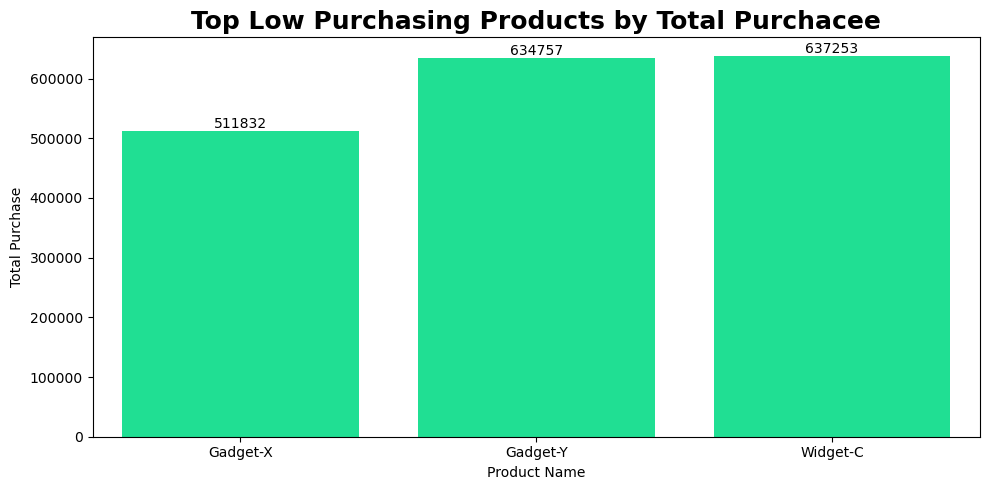

In [29]:
plt.figure(figsize=(10,5))

a= sns.barplot(
    data= low_value,
    x= "product_name",
    y= "total_inventory_purchase",
    color ="#00FF99",
)

plt.title("Top Low Purchasing Products by Total Purchacee", fontsize= 18, fontweight= "bold")
plt.xlabel("Product Name")
plt.ylabel("Total Purchase")
plt.tight_layout()
for container in a.containers:
    a.bar_label(container)

In [30]:
# By Quantity
low_quantity= df.groupby("product_name")["quantity"].sum().sort_values().head(3).reset_index()
low_quantity

,product_name,quantity
0,Gadget-X,16850
1,Widget-B,23150
2,Widget-A,23250


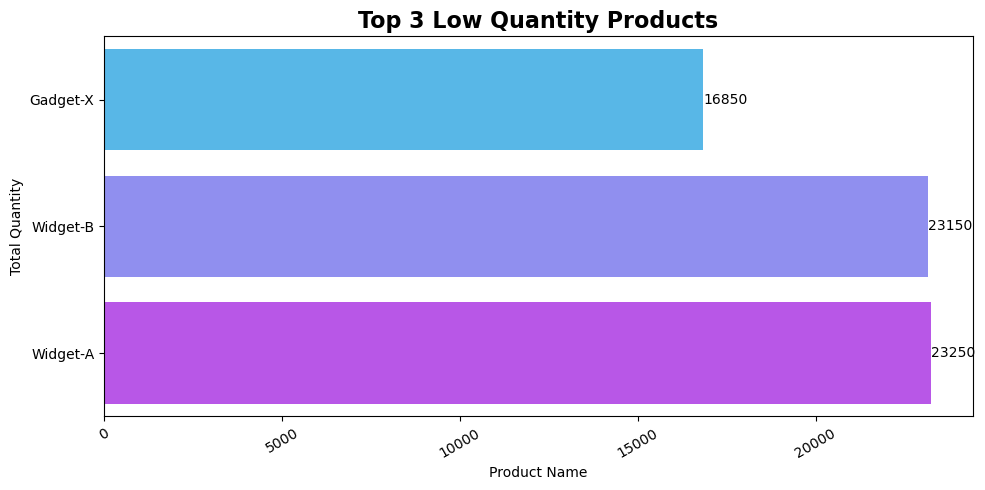

In [31]:
plt.figure(figsize=(10,5))

ax = sns.barplot(
    data=low_quantity,
    x="quantity",
    y="product_name",
    palette="cool",
    hue= "product_name"
)

plt.title("Top 3 Low Quantity Products", fontsize=16, fontweight="bold")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity")
plt.xticks(rotation=30)

# labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


## 3. Product Status Analysis

In [32]:
low = 100
critical = 50 

df["stock_level"] = "Healthy"
df.loc[df["quantity"] < low, "stock_level"] = "Low"
df.loc[df["quantity"] < critical, "stock_level"] = "Critical"

low_items = df[df["stock_level"] == "Low"]
critical_items = df[df["stock_level"] == "Critical"]

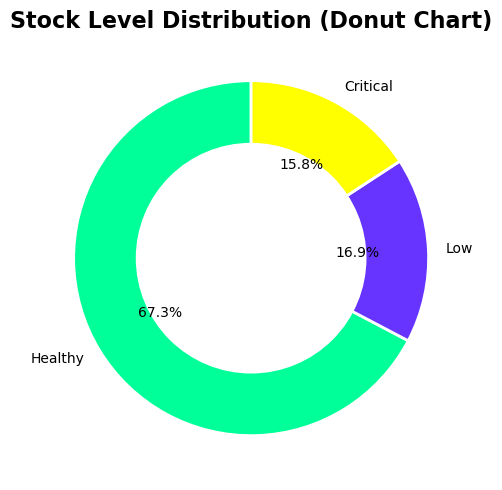

In [34]:
stock_counts = df["stock_level"].value_counts()
ed= ["#00FF99","#6633FF","yellow"]
plt.figure(figsize=(7,5))

plt.pie(
    stock_counts,
    labels=stock_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors= ed,
    wedgeprops={"edgecolor": "white", "linewidth": 2}
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.65, fc="white")
plt.gca().add_artist(centre_circle)

plt.title("Stock Level Distribution (Donut Chart)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


# Creating KPI

In [35]:
# Purchase centric KPIs: -
total_purchase_kpi = total_purchase["total_inventory_purchase"].sum()
total_quantity_kpi = total_quantity["quantity"].sum()

avg_monthly_purchase = monthly_purchase["total_inventory_purchase"].mean()

top_category = total_purchase.sort_values(
    "total_inventory_purchase",
    ascending=False
).iloc[0]["category"]


In [36]:
# Product centric KPIs: -
top_product = top_value.iloc[0]["product_name"]

total_sold = df["quantity"].sum()

low_stock_count = df[
    df["stock_level"].isin(["Low", "Critical"])
].shape[0]

avg_product_value = df["total_inventory_purchase"].mean()

In [37]:
# Creating KPI function because its reusable
def draw_kpi(ax, title, value, color):
    ax.axis("off")

    ax.text(
        0.5, 0.65,
        value,
        fontsize=22,
        fontweight="bold",
        ha="center",
        color=color
    )

    ax.text(
        0.5, 0.3,
        title,
        fontsize=12,
        ha="center"
    )

    ax.add_patch(
        plt.Rectangle(
            (0, 0),
            1, 1,
            fill=False,
            edgecolor=color,
            linewidth=2
        )
    )


# PURCHASE CENTRIC DASHBOARD

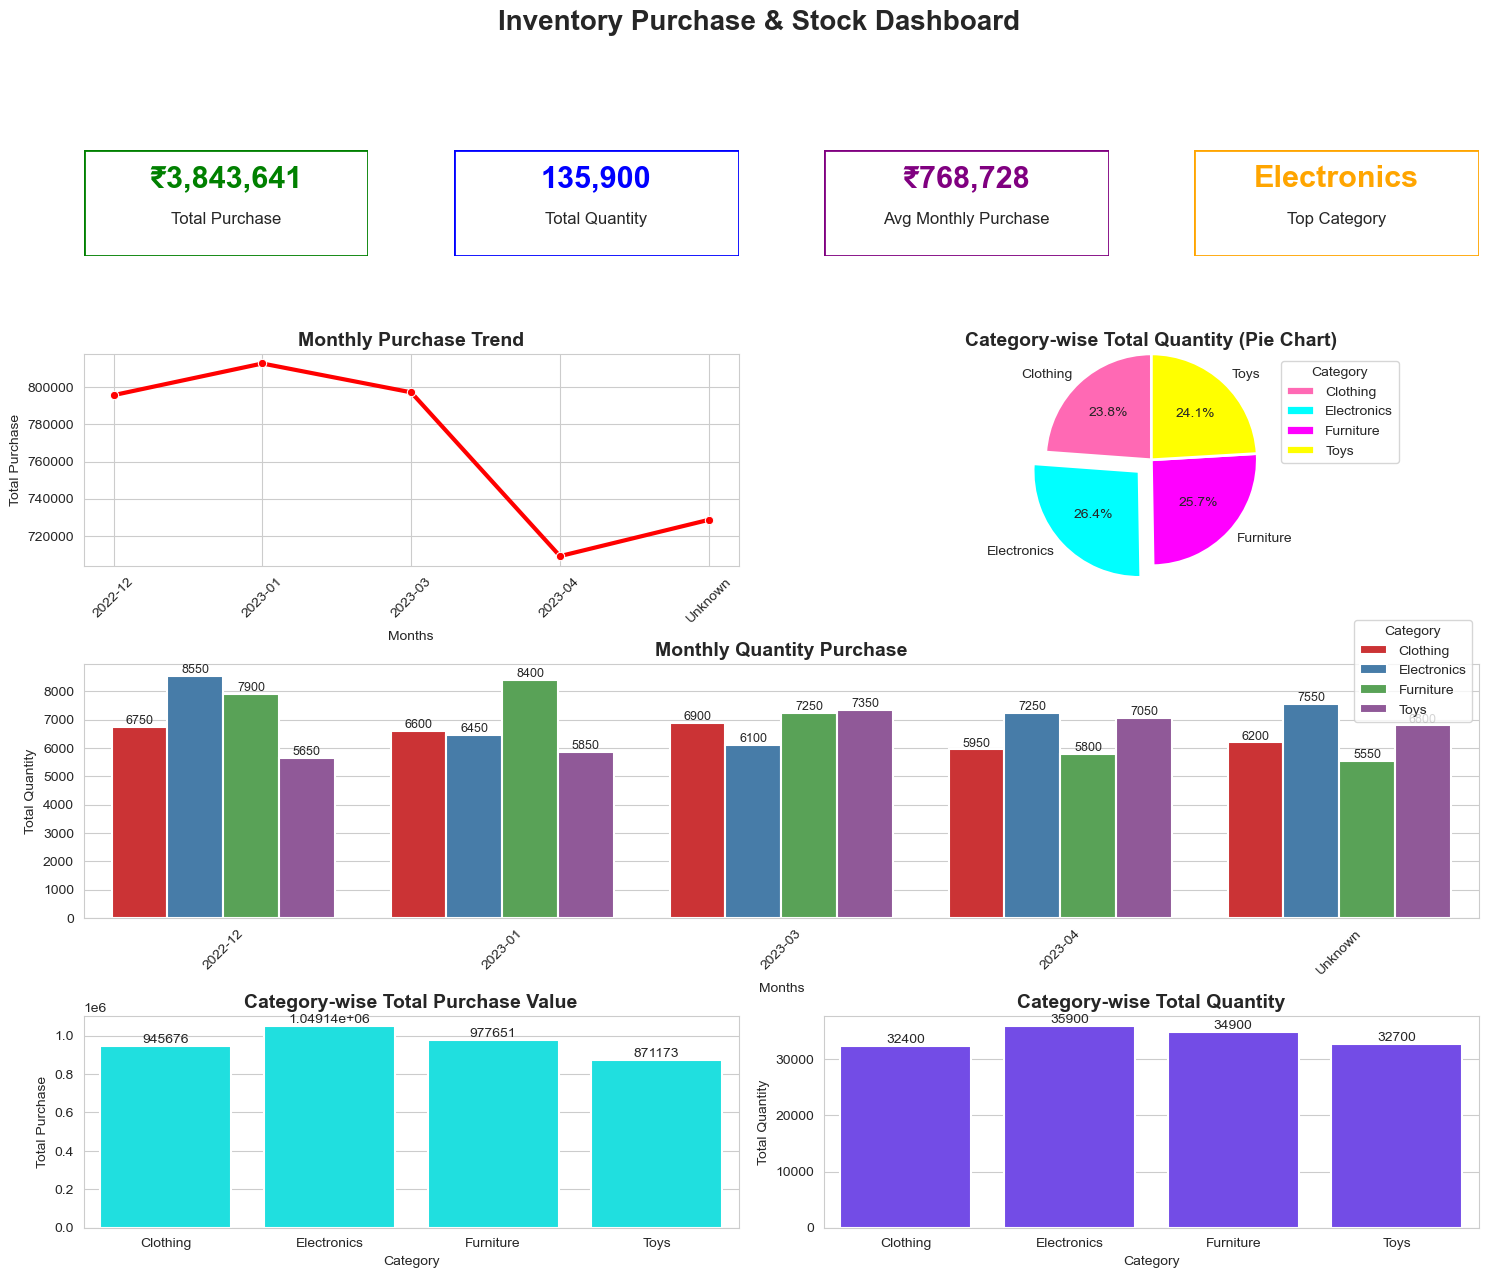

In [38]:
import matplotlib.gridspec as gridspec

sns.set_style("whitegrid")

fig = plt.figure(figsize=(18, 14))
gs = gridspec.GridSpec(4, 4, height_ratios=[0.5, 1, 1.2, 1], hspace=0.5, wspace=0.3)

fig.suptitle("Inventory Purchase & Stock Dashboard", fontsize=20, fontweight="bold")

# ================= KPI ROW ==================

kpi1 = fig.add_subplot(gs[0, 0])
draw_kpi(kpi1, "Total Purchase",
         f"₹{total_purchase_kpi:,.0f}",
         "green")

kpi2 = fig.add_subplot(gs[0, 1])
draw_kpi(kpi2, "Total Quantity",
         f"{total_quantity_kpi:,}",
         "blue")

kpi3 = fig.add_subplot(gs[0, 2])
draw_kpi(kpi3, "Avg Monthly Purchase",
         f"₹{avg_monthly_purchase:,.0f}",
         "purple")

kpi4 = fig.add_subplot(gs[0, 3])
draw_kpi(kpi4, "Top Category",
         top_category,
         "orange")

# =========================================================
# AXIS 2 (Second row)
# =========================================================

# ------------------ 1) Monthly Purchase Trend (Top Left) ------------------
ax1 = fig.add_subplot(gs[1, 0:2])
sns.lineplot(
    data=monthly_purchase,
    x="year_month",
    y="total_inventory_purchase",
    color="red",
    marker="o",
    linewidth=3,
    ax=ax1
)
ax1.set_title("Monthly Purchase Trend", fontsize=14, fontweight="bold")
ax1.set_xlabel("Months")
ax1.set_ylabel("Total Purchase")
ax1.tick_params(axis="x", rotation=45)


# ------------------ 2) Stock Level (Pie Chart) ------------------
ax2 = fig.add_subplot(gs[1, 2:4])

m = [0, 0.2, 0, 0]
colors = ["hotpink", "cyan", "magenta", "yellow"]

ax2.pie(
    total_quantity["quantity"],
    labels=total_quantity["category"],
    autopct="%1.1f%%",
    startangle=90,
    radius=1.25,
    explode=m,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 2}
)

ax2.set_title("Category-wise Total Quantity (Pie Chart)", fontsize=14, fontweight="bold")
ax2.legend(title="Category", loc="upper right", bbox_to_anchor=(1.7, 1))

# =========================================================
# AXIS 3 (Third row)
# =========================================================

# ------------------ 3) Monthly Quantity Purchase (FULL WIDTH Row 1) ------------------
ax3 = fig.add_subplot(gs[2, :])

a = sns.barplot(
    data=monthly_quantity,
    x="year_month",
    y="quantity",
    palette="Set1",
    hue="category",
    linewidth=1.5,
    ax=ax3
)

ax3.set_title("Monthly Quantity Purchase", fontsize=14, fontweight="bold")
ax3.set_xlabel("Months")
ax3.set_ylabel("Total Quantity")
ax3.tick_params(axis="x", rotation=45)
ax3.legend(title="Category", loc="upper right", bbox_to_anchor=(1, 1.2))

for container in a.containers:
    ax3.bar_label(container, fontsize=9)

# =========================================================
# Last AXIS (Forth row)
# =========================================================

# ------------------ 4) Category-wise Total Purchase (Bottom Left) ------------------
ax4 = fig.add_subplot(gs[3, 0:2])

b = sns.barplot(
    data=total_purchase,
    x="category",
    y="total_inventory_purchase",
    color="#00ffff",
    linewidth=1.5,
    ax=ax4
)

ax4.set_title("Category-wise Total Purchase Value", fontsize=14, fontweight="bold")
ax4.set_xlabel("Category")
ax4.set_ylabel("Total Purchase")

for container in b.containers:
    ax4.bar_label(container, fontsize=10)


# ------------------ 5) Category-wise Total Quantity (Bottom Right) ------------------
ax5 = fig.add_subplot(gs[3, 2:4])

c = sns.barplot(
    data=total_quantity,
    x="category",
    y="quantity",
    color="#6633FF",
    linewidth=1.5,
    ax=ax5
)

ax5.set_title("Category-wise Total Quantity", fontsize=14, fontweight="bold")
ax5.set_xlabel("Category")
ax5.set_ylabel("Total Quantity")

for container in c.containers:
    ax5.bar_label(container, fontsize=10)

plt.show()


# PRODUCT CENTRIC DASHBOARD

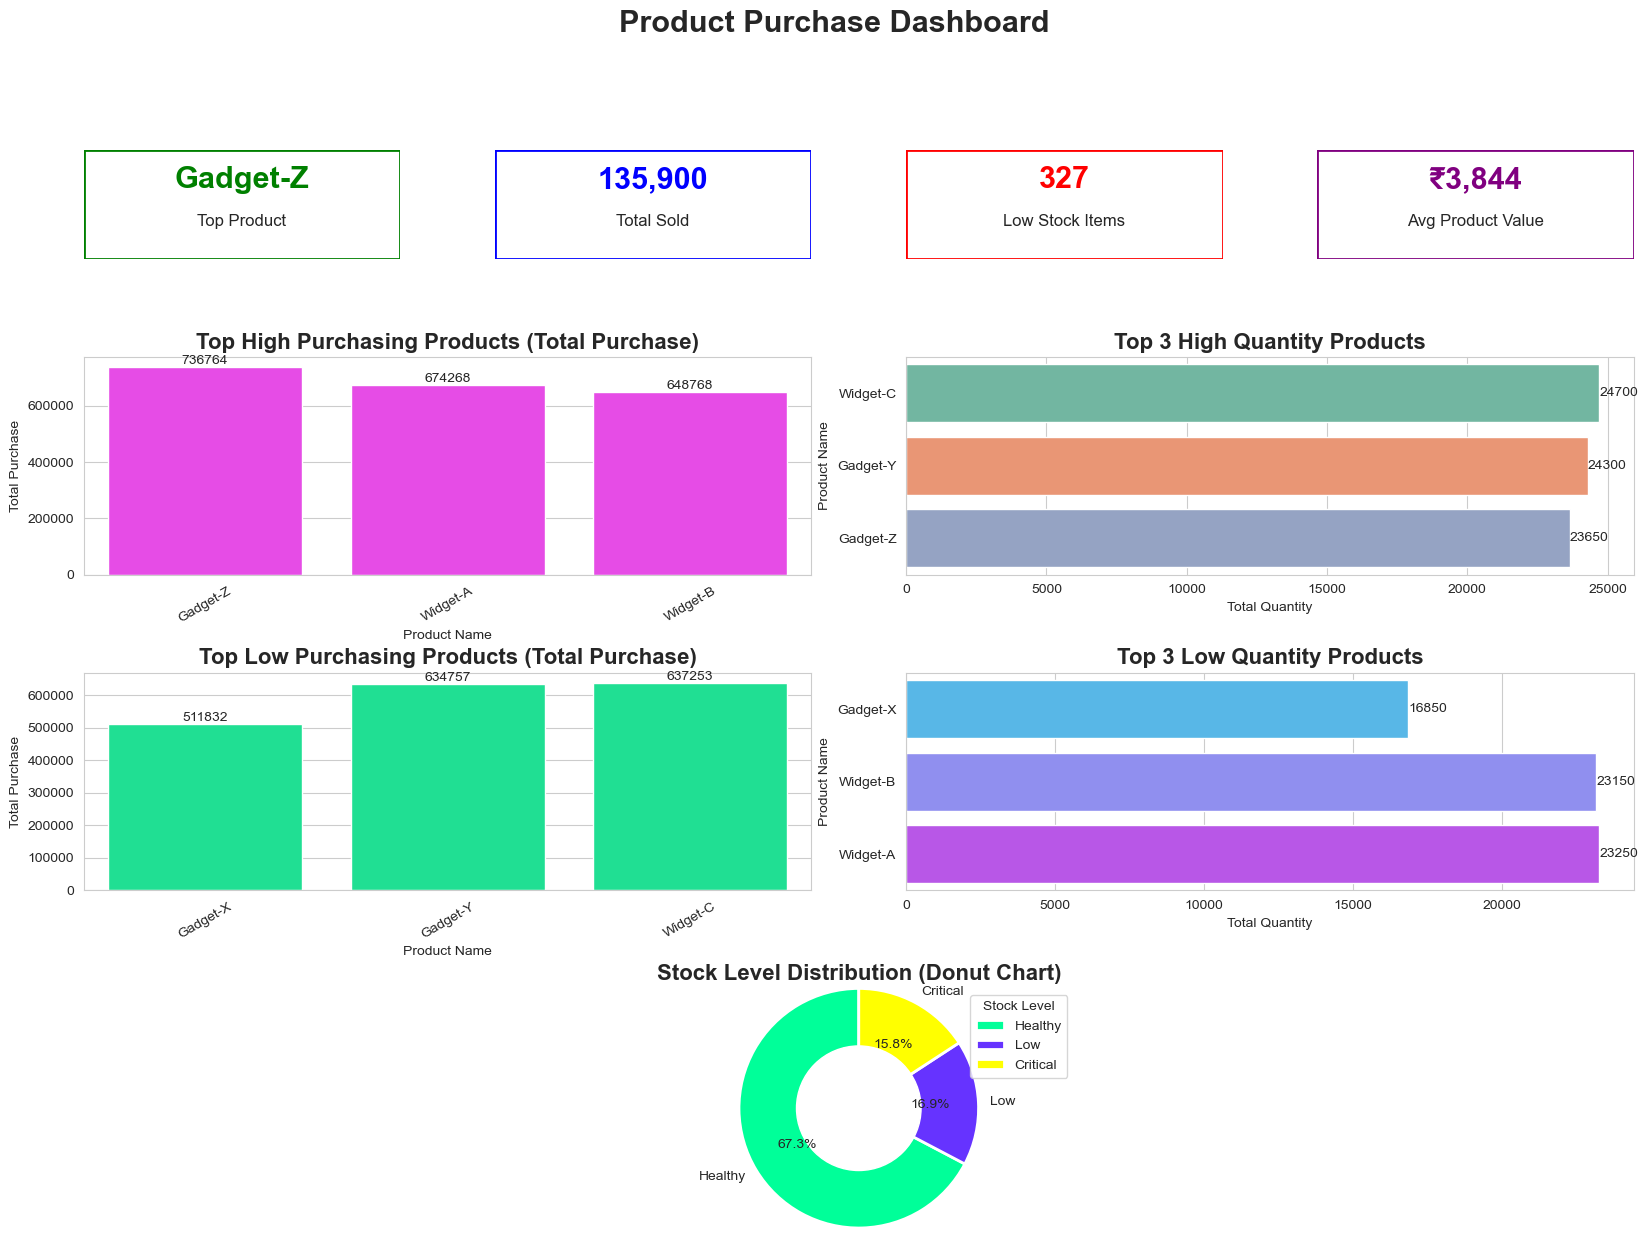

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

sns.set_style("whitegrid")

# ---------------- Dashboard Figure ----------------
fig = plt.figure(figsize=(20, 14))
gs = gridspec.GridSpec(4, 4, height_ratios=[0.5, 1, 1, 1.1], hspace=0.5, wspace=0.3)

fig.suptitle("Product Purchase Dashboard", fontsize=22, fontweight="bold")

# ================= KPI ROW ==================

kpi1 = fig.add_subplot(gs[0, 0])
draw_kpi(kpi1, "Top Product",
         top_product,
         "green")

kpi2 = fig.add_subplot(gs[0, 1])
draw_kpi(kpi2, "Total Sold",
         f"{total_sold:,}",
         "blue")

kpi3 = fig.add_subplot(gs[0, 2])
draw_kpi(kpi3, "Low Stock Items",
         str(low_stock_count),
         "red")

kpi4 = fig.add_subplot(gs[0, 3])
draw_kpi(kpi4, "Avg Product Value",
         f"₹{avg_product_value:,.0f}",
         "purple")



# =========================================================
# AXIS 2 (Second row)
# =========================================================

# ------------------ 1) Top High Purchasing Products ------------------
ax1 = fig.add_subplot(gs[1, 0:2])
a = sns.barplot(
    data=top_value,
    x="product_name",
    y="total_inventory_purchase",
    color="#FF33FF",
    ax=ax1
)
ax1.set_title("Top High Purchasing Products (Total Purchase)", fontsize=16, fontweight="bold")
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Total Purchase")
ax1.tick_params(axis="x", rotation=30)

for container in a.containers:
    a.bar_label(container)


# ------------------ 2) Top 3 High Quantity Products ------------------
ax2 = fig.add_subplot(gs[1, 2:4])
b = sns.barplot(
    data=top_quantity,
    x="quantity",
    y="product_name",
    palette="Set2",
    hue="product_name",
    ax=ax2
)

ax2.set_title("Top 3 High Quantity Products", fontsize=16, fontweight="bold")
ax2.set_xlabel("Total Quantity")
ax2.set_ylabel("Product Name")

for container in b.containers:
    b.bar_label(container)

ax2.legend([], [], frameon=False)


# =========================================================
# AXIS 3 (Third ROW)
# =========================================================

# ------------------ 3) Top Low Purchasing Products ------------------
ax3 = fig.add_subplot(gs[2, 0:2])
c = sns.barplot(
    data=low_value,
    x="product_name",
    y="total_inventory_purchase",
    color="#00FF99",
    ax=ax3
)

ax3.set_title("Top Low Purchasing Products (Total Purchase)", fontsize=16, fontweight="bold")
ax3.set_xlabel("Product Name")
ax3.set_ylabel("Total Purchase")
ax3.tick_params(axis="x", rotation=30)

for container in c.containers:
    c.bar_label(container)


# ------------------ 4) Top 3 Low Quantity Products ------------------
ax4 = fig.add_subplot(gs[2, 2:4])
d = sns.barplot(
    data=low_quantity,
    x="quantity",
    y="product_name",
    palette="cool",
    hue="product_name",
    ax=ax4
)

ax4.set_title("Top 3 Low Quantity Products", fontsize=16, fontweight="bold")
ax4.set_xlabel("Total Quantity")
ax4.set_ylabel("Product Name")

for container in d.containers:
    d.bar_label(container)

ax4.legend([], [], frameon=False)


# =========================================================
# LAST AXIS  -- Donut Chart
# =========================================================
ax5 = fig.add_subplot(gs[3, :])

stock_counts = df["stock_level"].value_counts()
ed = ["#00FF99", "#6633FF", "yellow"]

ax5.pie(
    stock_counts,
    labels=stock_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=ed,
     radius=1.25,
    wedgeprops={"edgecolor": "white", "linewidth": 2}
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.65, fc="white")
ax5.add_artist(centre_circle)

ax5.set_title("Stock Level Distribution (Donut Chart)", fontsize=16, fontweight="bold")
ax5.legend(title="Stock Level", loc="upper right", bbox_to_anchor=(1.4, 1))